# Case:

## O departamento de RH coletou dados dos funcionários e gostaria que você fizesse a previsão de quais são mais propensos para sair do emprego.

### Alguns exemplos de dados:

- Envolvimento com o trabalho
- Escolaridade
- Satisfação com o trabalho
- Métricas de desempenho
- Relacionamento
- Equilíbrio entre atividades pessoais e profissionais
- Outros
<br></br>
- Base de dados: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
- Cálculo de salário: https://www.mom.gov.sg/employment-practices/salary/monthly-and-daily-salary e https://sprout.zendesk.com/hc/en-us/articles/360030922133-How-to-Calculate-for-the-Daily-Rate-from-Your-Monthly-Salary-
- Stock: https://www.moneyunder30.com/employee-stock-options#:~:text=Typically%20they%20are%20granted%20to,a%20specific%20period%20of%20time

Education
1 'Below College',
2 'College',
3 'Bachelor',
4 'Master',
5 'Doctor',

EnvironmentSatisfaction
1 'Low',
2 'Medium',
3 'High',
4 'Very High',

JobInvolvement
1 'Low',
2 'Medium',
3 'High',
4 'Very High',

JobSatisfaction
1 'Low',
2 'Medium',
3 'High',
4 'Very High',

PerformanceRating
1 'Low',
2 'Good',
3 'Excellent',
4 'Outstanding',

RelationshipSatisfaction
1 'Low',
2 'Medium',
3 'High',
4 'Very High',

WorkLifeBalance
1 'Bad',
2 'Good',
3 'Better',
4 'Best',

## Importações

In [1]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

## DataFrame

In [2]:
df = pd.read_csv('../bases_de_dados/Human_Resources.csv')

In [3]:
df.shape

(1470, 35)

In [4]:
display(df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df[df['DistanceFromHome'] >= 29].count()

Age                         27
Attrition                   27
BusinessTravel              27
DailyRate                   27
Department                  27
DistanceFromHome            27
Education                   27
EducationField              27
EmployeeCount               27
EmployeeNumber              27
EnvironmentSatisfaction     27
Gender                      27
HourlyRate                  27
JobInvolvement              27
JobLevel                    27
JobRole                     27
JobSatisfaction             27
MaritalStatus               27
MonthlyIncome               27
MonthlyRate                 27
NumCompaniesWorked          27
Over18                      27
OverTime                    27
PercentSalaryHike           27
PerformanceRating           27
RelationshipSatisfaction    27
StandardHours               27
StockOptionLevel            27
TotalWorkingYears           27
TrainingTimesLastYear       27
WorkLifeBalance             27
YearsAtCompany              27
YearsInC

## Visualização dos dados

In [8]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
# apenas para praticar, essa coluna sera ser apagada posteriormente
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [10]:
# coluna que indica se o funcionário faz hora extra
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [11]:
np.unique(df['Over18'], return_counts=True)

(array([1], dtype=int64), array([1470], dtype=int64))

In [12]:
np.unique(df['OverTime'], return_counts=True)

(array([0, 1], dtype=int64), array([1054,  416], dtype=int64))

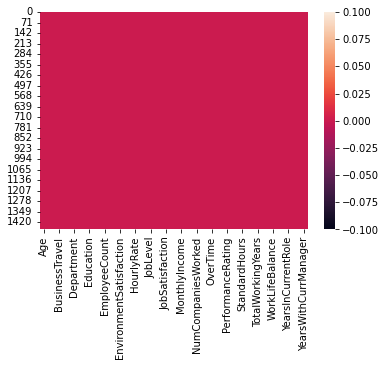

In [13]:
# ferramenta gráfica para visualizar se há valores nulos

# df.isnull().sum() # soma dos valores nulos em cada coluna
sns.heatmap(df.isnull());

## Plots

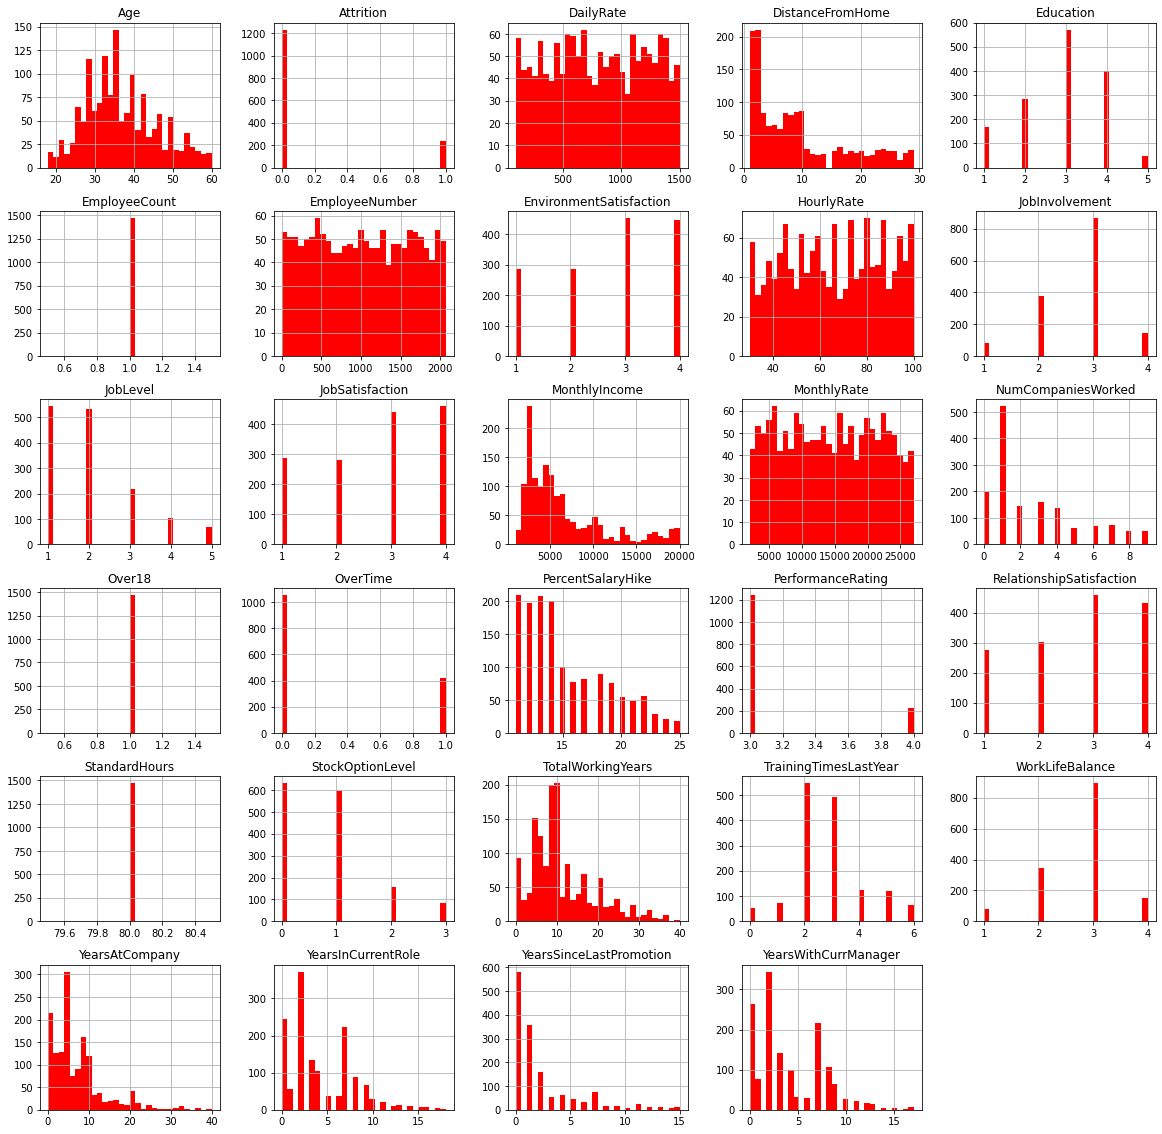

In [14]:
# analise de cada um dos atributos
df.hist(bins=30, figsize=(20, 20), color='r');

No gráfico acima percebemos que as colunas 'EmployeeCount', 'Over18' e 'StandardHours' são sempre o mesmo valor,
portanto podemos apagá-las da base de dados.
PS: a coluna 'EmployeeNumber' também pode ser apagada, pois é apenas um identificador do funcionário. (considerando que usaremos os dados para fazer uma previsão).

In [15]:
# axis=1 indica que queremos apagar as colunas
# inplace=True indica que estamos fazendo a alteracao nesse objeto, nao sendo necessario criar outro df
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [16]:
df.shape

(1470, 31)

In [17]:
# lef_df indica as pessoas que sairam da empresa
left_df = df[df['Attrition'] == 1]

# stayed_df indica as pessoas que permaneceram na empresa
stayed_df = df[df['Attrition'] == 0]

In [18]:
print('Total = ', len(df), '\n')

print('Funcionários que saíram da empresa: ', len(left_df))
print('Porcentagem que saíram da empresa: ', (len(left_df) / len(df)) * 100, '\n')

print('Funcionários que ficaram da empresa: ', len(stayed_df))
print('Porcentagem que ficaram da empresa: ', (len(stayed_df) / len(df)) * 100)

Total =  1470 

Funcionários que saíram da empresa:  237
Porcentagem que saíram da empresa:  16.122448979591837 

Funcionários que ficaram da empresa:  1233
Porcentagem que ficaram da empresa:  83.87755102040816


In [19]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [20]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [21]:
correlations = df.corr()

In [22]:
display(correlations)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


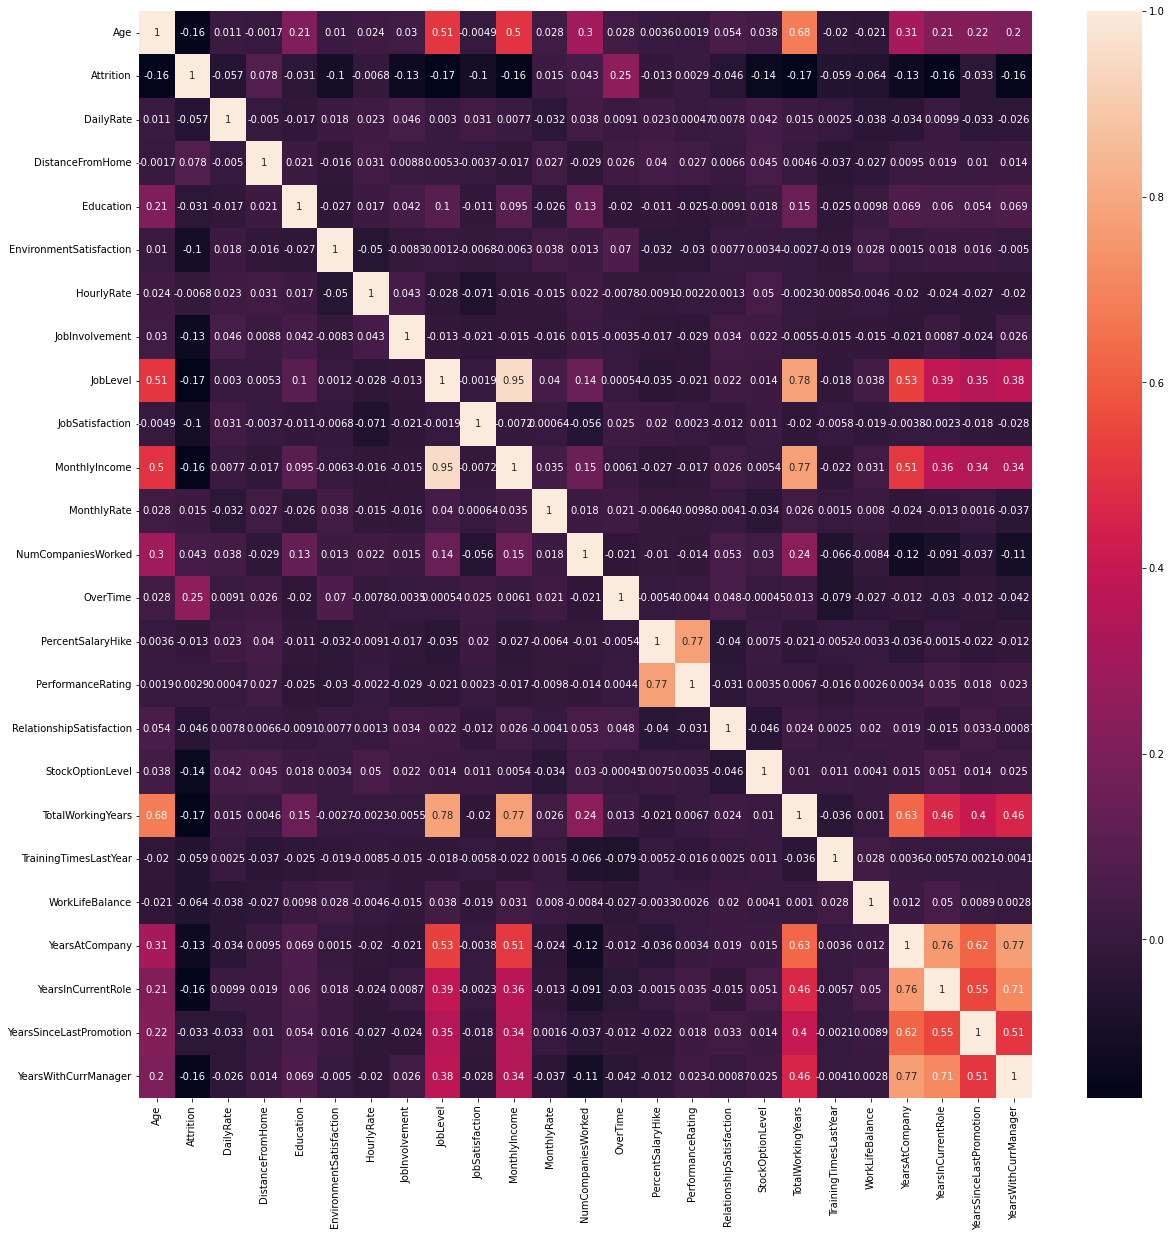

In [23]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, annot=True);

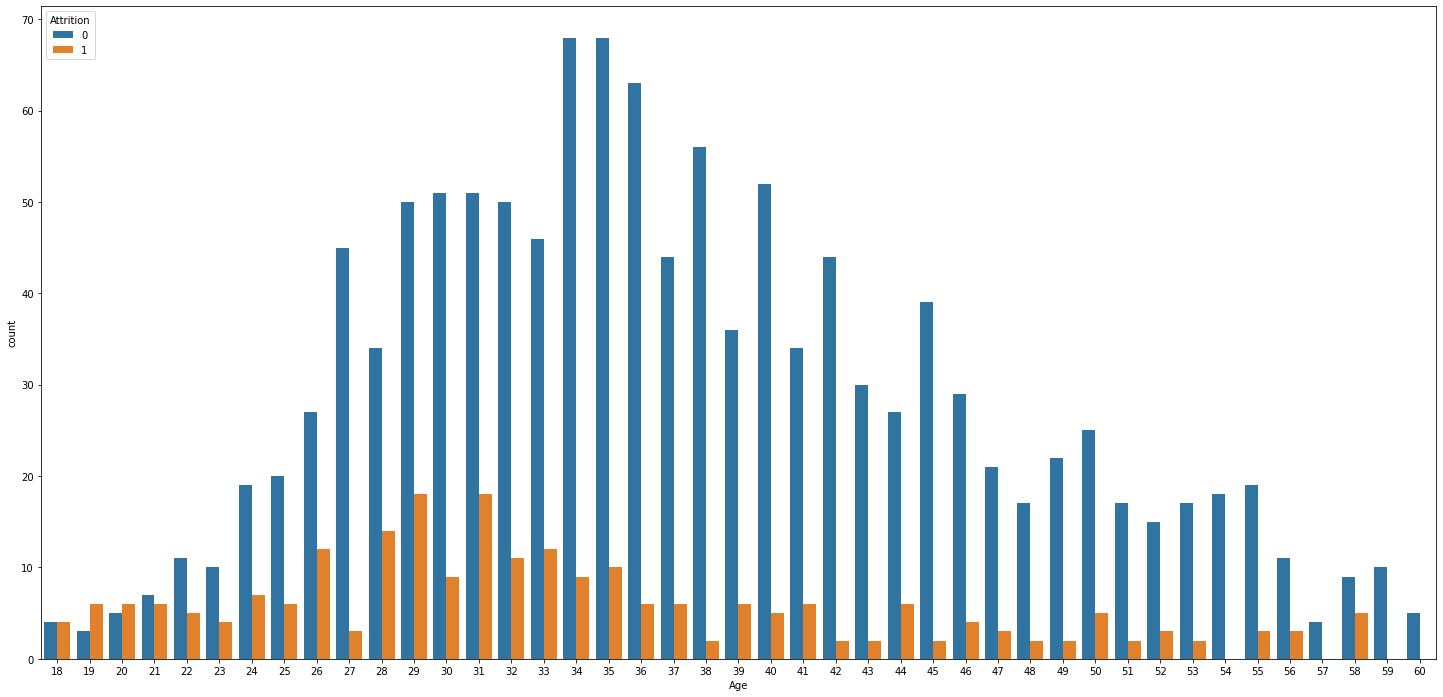

In [24]:
plt.figure(figsize=(25, 12))
sns.countplot(x = 'Age', hue = 'Attrition', data=df);

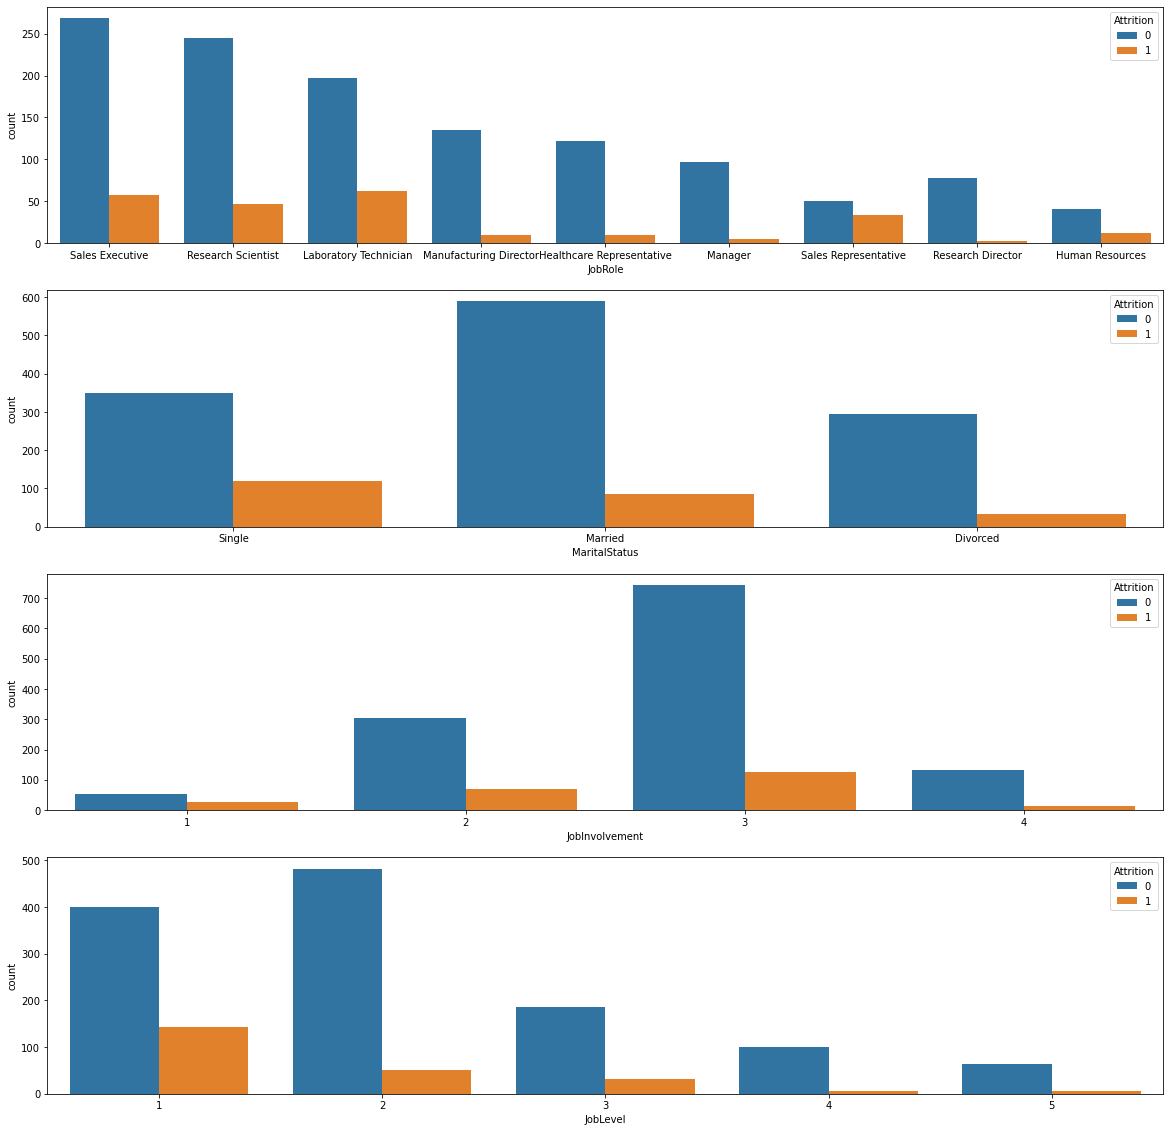

In [25]:
plt.figure(figsize=(20, 20))
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data=df);

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data=df);

plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data=df);

plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data=df);

## Insights gerados pela vizualição dos gráficos

- **JobLevel x MonthlyIncome** possuem a maior correlação, 95%.
- **JobLevel x TotalWorkingYears** possuem a 2ª maior correlação, 78%.
- A maior tendência de sair da empresa está no intervalo de idades de até **21 anos**.
- **54, 57, 59, e 60** não possuem tendência alguma de saírem do emprego.
- O setor que mais possuí saídas é o **Laboratory Technician**
- Em relação ao estado civil, **solteiros** possuem mais saídas.
- **Job Involvement** de nível 3 possuí o maior número de saídas (possível indicador de falta de incentivo, falta de diálogo entre liderança e liderados. Possível solução, incentivo ao diálogo entre funcionários, workshops e tarefas em grupo, até mesmo atividades de gamificação e/ou storytelling).
- **Job Level** de nível 1 possuí o maior número de saídas (possível indicador de poucos benefícios para profissionais mais capacitados. Possível solução, aumento de salário, melhor plano de saúde, férias remuneradas (pensar), víncular com o 'Job Involvement').

### KDE (Kernel Density Estimate)

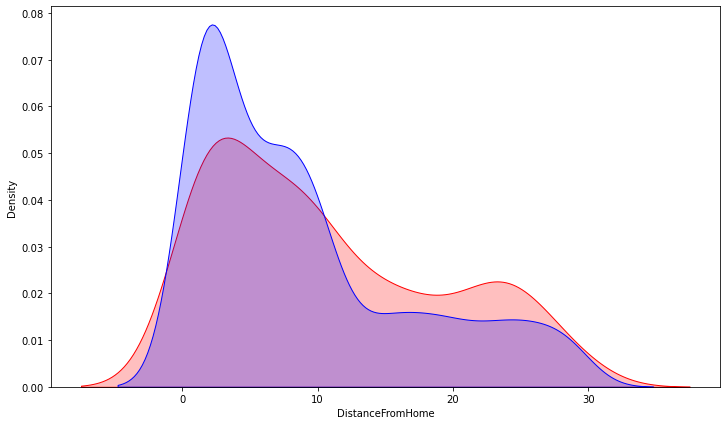

In [26]:
plt.figure(figsize=(12, 7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Funcionários que saíram', color='r', shade=True);
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Funcionários que ficaram', color='b', shade=True);

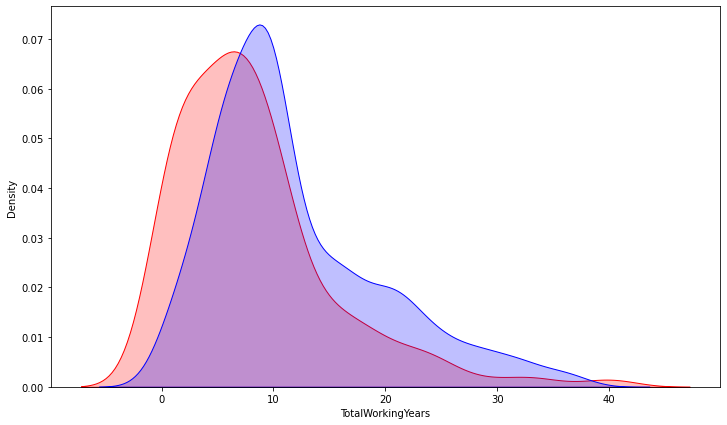

In [27]:
plt.figure(figsize=(12, 7))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Funcionários que saíram', color='r', shade=True);
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Funcionários que ficaram', color='b', shade=True);

### Boxplot

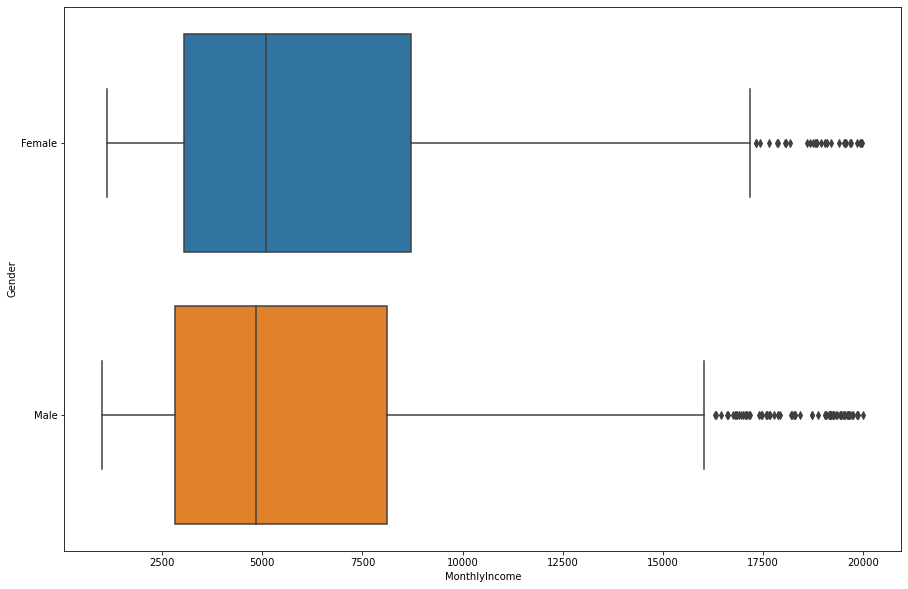

In [28]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data=df);

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobRole'>

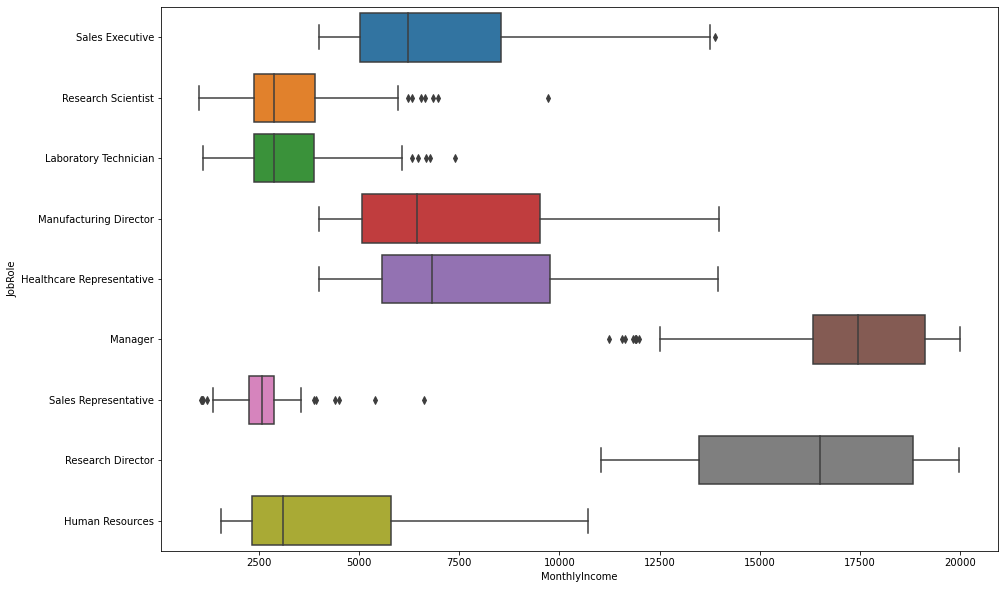

In [29]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=df);

## Pré-processamento e bases de treinamento/teste

In [30]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [31]:
# separamos os atributos categoricos em uma nova base de dados
x_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [32]:
x_cat.head(2)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married


## Tratamento de atributos categóricos

Precisamos tratar os dados, mas sem fazer com os mesmos possuam uma ordem de importância.

Male |Female |
-----|-----|
    1|0|
    0|1|


Single |Married |Divorced
-----|-----|----- 
    1|0|0
    0|1|0
    0|0|1

In [34]:
onehot = OneHotEncoder()

In [35]:
x_cat = onehot.fit_transform(x_cat).toarray()

In [36]:
x_cat.shape

(1470, 26)

In [37]:
x_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [38]:
x_cat = pd.DataFrame(x_cat)
type(x_cat)

pandas.core.frame.DataFrame

In [39]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [40]:
x_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [41]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [42]:
x_numerical = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction','MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
    'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
    'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [43]:
x_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [44]:
x_all = pd.concat([x_cat, x_numerical], axis=1)

In [45]:
x_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [46]:
x_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0                         1470 non-null   float64
 1   1                         1470 non-null   float64
 2   2                         1470 non-null   float64
 3   3                         1470 non-null   float64
 4   4                         1470 non-null   float64
 5   5                         1470 non-null   float64
 6   6                         1470 non-null   float64
 7   7                         1470 non-null   float64
 8   8                         1470 non-null   float64
 9   9                         1470 non-null   float64
 10  10                        1470 non-null   float64
 11  11                        1470 non-null   float64
 12  12                        1470 non-null   float64
 13  13                        1470 non-null   float64
 14  14      

## Normalização dos dados

In [48]:
scaler = MinMaxScaler()

In [49]:
x = scaler.fit_transform(x_all)

C:\Users\Gregory\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Gregory\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [50]:
x

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [51]:
y = df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Dividir a base de dados em base de treino e base de teste

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [54]:
x_train.shape, y_train

((1102, 50),
 1352    0
 554     0
 927     0
 740     0
 1272    0
        ..
 1370    0
 4       0
 119     0
 680     0
 572     0
 Name: Attrition, Length: 1102, dtype: int64)

In [55]:
x_test.shape, y_test

((368, 50),
 979     0
 849     1
 556     0
 164     0
 1442    1
        ..
 1080    0
 443     1
 1194    0
 294     0
 868     0
 Name: Attrition, Length: 368, dtype: int64)

# Implementação - Regressão Logística

In [67]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression()

In [68]:
y_pred = logistic_model.predict(x_test)

In [69]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [70]:
y_test2 = np.array(y_test)
y_test2, y_test2.shape

(array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 

In [72]:
accuracy_score(y_test, y_pred)

0.8641304347826086

In [81]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[301,   5],
       [ 45,  17]], dtype=int64)

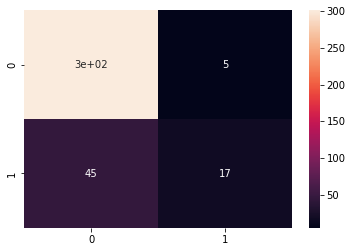

In [82]:
sns.heatmap(cm, annot=True);

In [89]:
# Precision

precision = 17 / (17 + 5)
precision

0.7727272727272727

In [90]:
# Recall

17 / (17 + 45)

0.27419354838709675

In [93]:
precision_score(y_test, y_pred)

0.7727272727272727

In [94]:
recall_score(y_test, y_pred)

0.27419354838709675

In [101]:
f1_score(y_test, y_pred, average='macro')

0.6640373940987438

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       306
           1       0.77      0.27      0.40        62

    accuracy                           0.86       368
   macro avg       0.82      0.63      0.66       368
weighted avg       0.85      0.86      0.84       368



# Implementação - Random Forest

In [104]:
model_forest = RandomForestClassifier()
model_forest.fit(x_train, y_train)

RandomForestClassifier()

In [105]:
y_pred = model_forest.predict(x_test)

In [106]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [108]:
np.array(y_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [109]:
accuracy_score(y_test, y_pred)

0.842391304347826

In [111]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[304,   2],
       [ 56,   6]], dtype=int64)

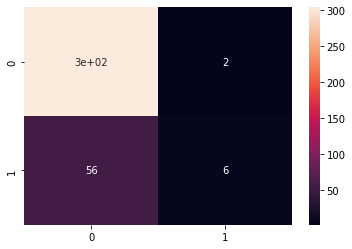

In [112]:
sns.heatmap(cm, annot=True);

In [113]:
precision_score(y_test, y_pred)

0.75

In [115]:
recall_score(y_test, y_pred)

0.0967741935483871

In [116]:
f1_score(y_test, y_pred)

0.1714285714285714

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       306
           1       0.75      0.10      0.17        62

    accuracy                           0.84       368
   macro avg       0.80      0.55      0.54       368
weighted avg       0.83      0.84      0.79       368



# Implementação - Rede Neural Artificial

In [120]:
neural_network = tf.keras.models.Sequential()

neural_network.add(tf.keras.layers.Dense(units = 25, activation = 'relu', input_shape = (50,)))
neural_network.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
neural_network.add(tf.keras.layers.Dense(units = 25, activation = 'relu'))
neural_network.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [121]:
neural_network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 25)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [122]:
neural_network.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [123]:
neural_network.fit(x_train, y_train, epochs = 200)

Epoch 1/200
35/35 [==============================] - 1s 3ms/step - loss: 0.5543 - accuracy: 0.7840
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 0.4238 - accuracy: 0.8412
Epoch 3/200
35/35 [==============================] - 0s 5ms/step - loss: 0.4044 - accuracy: 0.8412
Epoch 4/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3891 - accuracy: 0.8412
Epoch 5/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3732 - accuracy: 0.8412
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 0.3562 - accuracy: 0.8412
Epoch 7/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3417 - accuracy: 0.8566
Epoch 8/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3252 - accuracy: 0.8675
Epoch 9/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3118 - accuracy: 0.8775
Epoch 10/200
35/35 [==============================] - 0s 4ms/step - loss: 0.3010 - accuracy: 0.8811
Epoch 11/

35/35 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9991
Epoch 84/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.9991
Epoch 85/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9991
Epoch 86/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9991
Epoch 87/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 88/200
35/35 [==============================] - 0s 5ms/step - loss: 0.0067 - accuracy: 1.0000
Epoch 89/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9991
Epoch 90/200
35/35 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000
Epoch 91/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 1.0000
Epoch 92/200
35/35 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 93/200


Epoch 163/200
35/35 [==============================] - 0s 4ms/step - loss: 3.0571e-04 - accuracy: 1.0000
Epoch 164/200
35/35 [==============================] - 0s 4ms/step - loss: 2.9289e-04 - accuracy: 1.0000
Epoch 165/200
35/35 [==============================] - 0s 3ms/step - loss: 2.7392e-04 - accuracy: 1.0000
Epoch 166/200
35/35 [==============================] - 0s 4ms/step - loss: 2.6838e-04 - accuracy: 1.0000
Epoch 167/200
35/35 [==============================] - 0s 3ms/step - loss: 2.5772e-04 - accuracy: 1.0000
Epoch 168/200
35/35 [==============================] - 0s 3ms/step - loss: 2.6539e-04 - accuracy: 1.0000
Epoch 169/200
35/35 [==============================] - 0s 3ms/step - loss: 2.6587e-04 - accuracy: 1.0000
Epoch 170/200
35/35 [==============================] - 0s 4ms/step - loss: 2.4110e-04 - accuracy: 1.0000
Epoch 171/200
35/35 [==============================] - 0s 3ms/step - loss: 2.2756e-04 - accuracy: 1.0000
Epoch 172/200
35/35 [==============================] - 

In [124]:
y_pred = neural_network.predict(x_test)
y_pred

array([[1.05256854e-11],
       [9.73194301e-01],
       [1.44401906e-14],
       [4.13638845e-05],
       [5.57237809e-06],
       [8.02371126e-23],
       [5.57229740e-12],
       [4.78839874e-03],
       [2.71074652e-09],
       [1.41448692e-16],
       [8.29418302e-01],
       [2.17574734e-06],
       [1.85347817e-14],
       [6.43823439e-09],
       [4.17031343e-09],
       [7.54321803e-15],
       [7.78149962e-02],
       [1.53782970e-19],
       [3.42659685e-11],
       [9.78031887e-16],
       [5.55707932e-01],
       [7.39019306e-05],
       [7.06315935e-01],
       [2.09171633e-20],
       [1.93665857e-13],
       [2.51785652e-16],
       [1.02840613e-06],
       [9.82794642e-01],
       [5.83058438e-18],
       [0.00000000e+00],
       [1.39407985e-09],
       [1.27627084e-11],
       [2.89165378e-02],
       [4.36751565e-21],
       [2.97720670e-09],
       [2.78300104e-06],
       [9.27879409e-19],
       [1.18726540e-17],
       [1.02884323e-05],
       [2.98972950e-14],


In [125]:
y_pred = (y_pred >= 0.5)
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [127]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[278,  28],
       [ 37,  25]], dtype=int64)

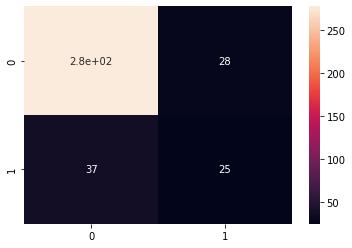

In [128]:
sns.heatmap(cm, annot=True);

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       306
           1       0.47      0.40      0.43        62

    accuracy                           0.82       368
   macro avg       0.68      0.66      0.67       368
weighted avg       0.81      0.82      0.82       368



In [130]:
# nossa base de dados esta desbalanceada
np.unique(df['Attrition'], return_counts=True)

(array([0, 1], dtype=int64), array([1233,  237], dtype=int64))

## Salvar o classificador

In [134]:
with open('variables.pkl', 'wb') as f:
    pickle.dump([scaler, onehot, logistic_model], f)

## Carregar o classificador

In [135]:
with open('variables.pkl', 'rb') as f:
    min_max, encoder, logistic = pickle.load(f)

In [153]:
min_max, encoder, logistic

(MinMaxScaler(), OneHotEncoder(), LogisticRegression())